In [22]:
import pandas as pd

# Load the dataset
file_path = '/content/insurance.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the dataset structure
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
# 1. Dataset Description and Summary Statistics

# Summary statistics
summary_stats = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Convert categorical features into numerical values
# Using label encoding for 'sex', 'smoker', and 'region'
data_encoded = data.copy()

# Label encoding for 'sex' and 'smoker'
data_encoded['sex'] = data_encoded['sex'].map({'male': 0, 'female': 1})
data_encoded['smoker'] = data_encoded['smoker'].map({'yes': 1, 'no': 0})

# One-hot encoding for 'region'
data_encoded = pd.get_dummies(data_encoded, columns=['region'], drop_first=True)

# Display the encoded dataset summary
print("Encoded Dataset Summary:")
display(data_encoded.head())  # Use display() in Colab for cleaner output

# Output the summary statistics and missing values
print("Summary Statistics:")
display(summary_stats)

print("Missing Values:")
display(missing_values)

Encoded Dataset Summary:


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


Summary Statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Missing Values:


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


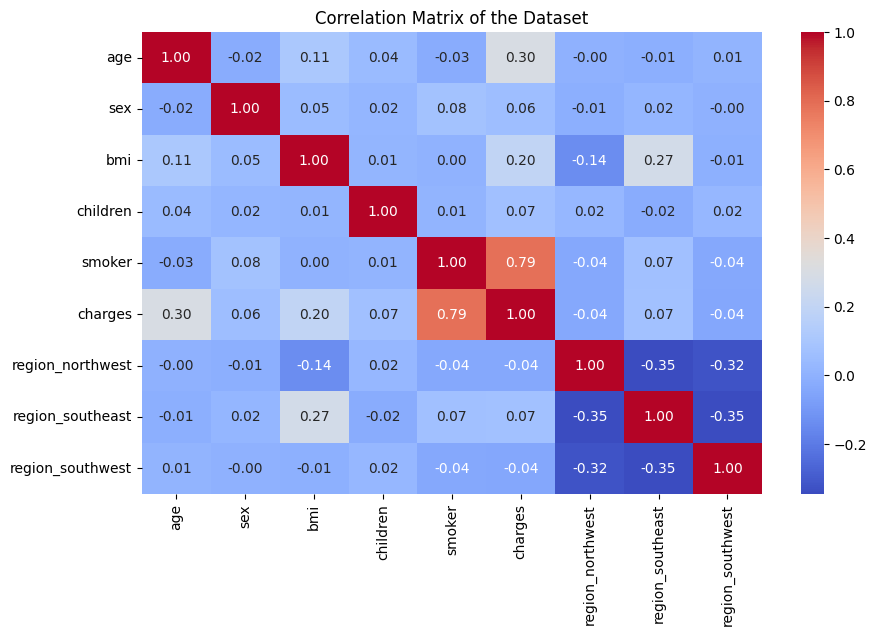

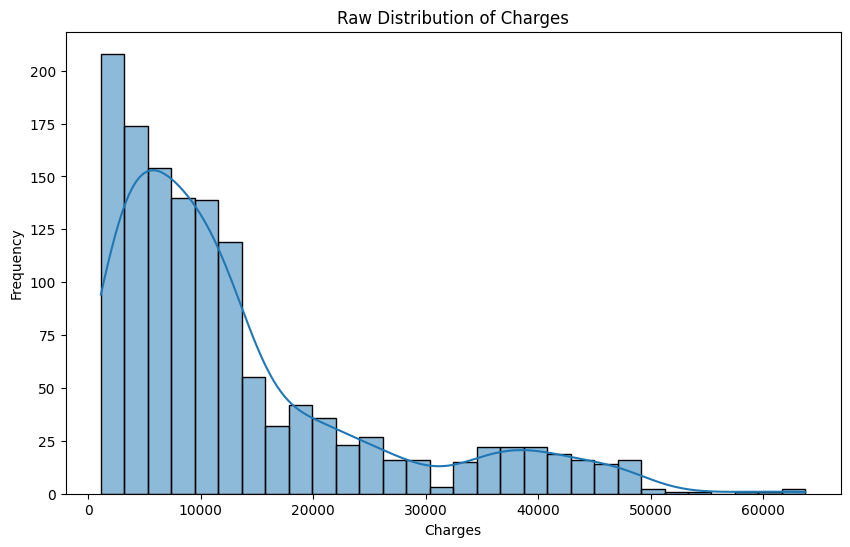

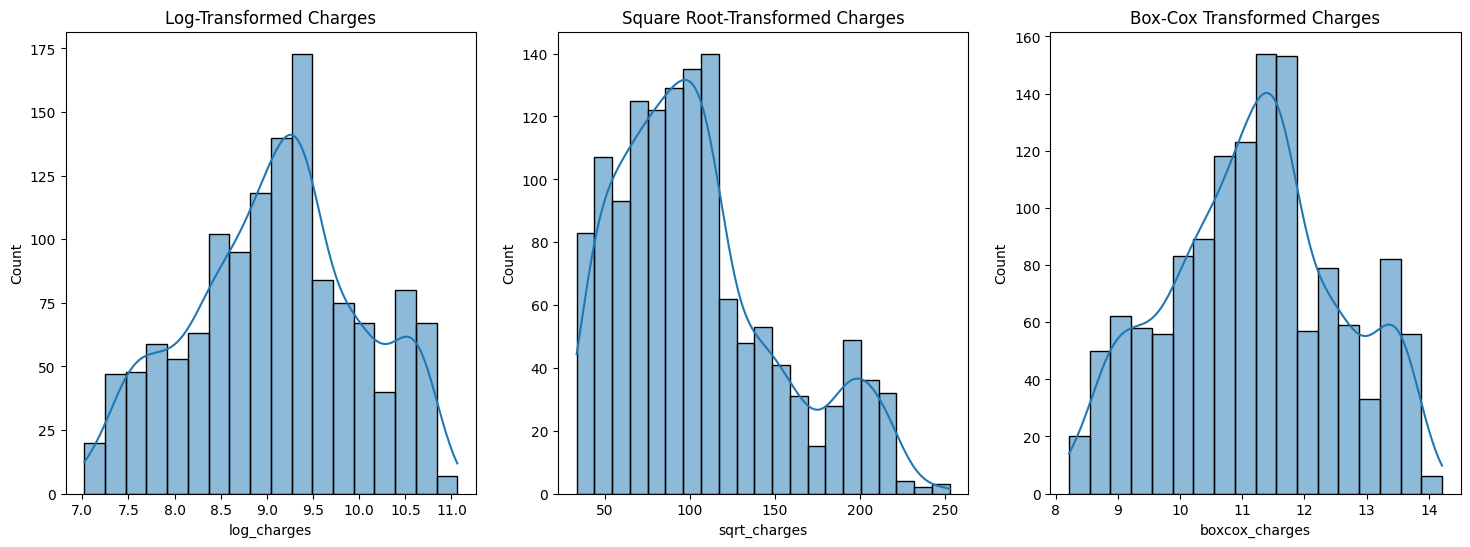

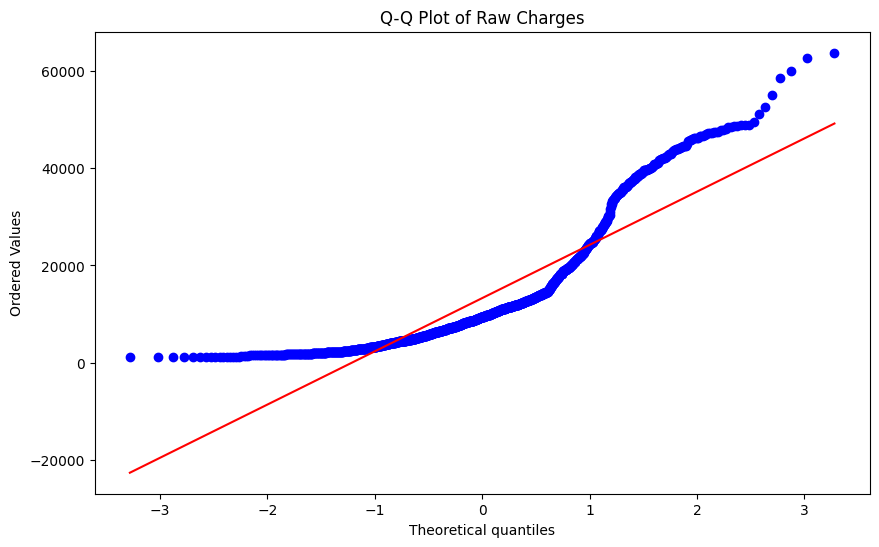

Shapiro-Wilk Test p-value (Raw Charges): 1.1505226334932036e-36
Kolmogorov-Smirnov Test p-value (Raw Charges): 4.381949677777384e-42
Anderson-Darling Test statistic (Raw Charges): 85.12851936032212
D'Agostino’s K² Test p-value (Raw Charges): 7.019807901276197e-74

Hypothesis Testing Results:
Shapiro-Wilk Test: Reject H₀: The data does not follow a normal distribution.
Kolmogorov-Smirnov Test: Reject H₀: The data does not follow a normal distribution.
D'Agostino’s K² Test: Reject H₀: The data does not follow a normal distribution.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro, kstest, anderson, normaltest, probplot, boxcox

# Assuming 'data' dataframe is already loaded as per the initial block

# 1. Dataset Summary
summary_stats = data.describe()
missing_values = data.isnull().sum()

# 2. Data Encoding
data_encoded = data.copy()
label_encoder = LabelEncoder()

# Label Encoding for 'sex' and 'smoker'
data_encoded['sex'] = label_encoder.fit_transform(data_encoded['sex'])
data_encoded['smoker'] = label_encoder.fit_transform(data_encoded['smoker'])

# One-Hot Encoding for 'region'
data_encoded = pd.get_dummies(data_encoded, columns=['region'], drop_first=True)

# 3. Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of the Dataset")
plt.show()

# 4. Histogram for the Raw Charges
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['charges'], kde=True)
plt.title('Raw Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Apply Transformations: Log, Square Root, and Box-Cox
data_encoded['log_charges'] = np.log(data_encoded['charges'])
data_encoded['sqrt_charges'] = np.sqrt(data_encoded['charges'])
data_encoded['boxcox_charges'], _ = boxcox(data_encoded['charges'] + 1)  # Adding 1 to avoid zero values

# Histograms for the Transformed Charges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(data_encoded['log_charges'], kde=True, ax=axes[0])
axes[0].set_title('Log-Transformed Charges')

sns.histplot(data_encoded['sqrt_charges'], kde=True, ax=axes[1])
axes[1].set_title('Square Root-Transformed Charges')

sns.histplot(data_encoded['boxcox_charges'], kde=True, ax=axes[2])
axes[2].set_title('Box-Cox Transformed Charges')

plt.show()

# 5. Q-Q Plot for the Raw Charges
plt.figure(figsize=(10, 6))
probplot(data_encoded['charges'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Raw Charges')
plt.show()

# 6. Normality Tests
# Shapiro-Wilk Test
shapiro_test = shapiro(data_encoded['charges'])
print("Shapiro-Wilk Test p-value (Raw Charges):", shapiro_test.pvalue)

# Kolmogorov-Smirnov Test
kstest_result = kstest(data_encoded['charges'], 'norm', args=(data_encoded['charges'].mean(), data_encoded['charges'].std()))
print("Kolmogorov-Smirnov Test p-value (Raw Charges):", kstest_result.pvalue)

# Anderson-Darling Test
anderson_result = anderson(data_encoded['charges'], dist='norm')
print("Anderson-Darling Test statistic (Raw Charges):", anderson_result.statistic)

# D'Agostino's K² Test
dagostino_test = normaltest(data_encoded['charges'])
print("D'Agostino’s K² Test p-value (Raw Charges):", dagostino_test.pvalue)

# 7. Hypothesis Testing
# Function for Hypothesis Testing
def hypothesis_testing(p_value, alpha=0.05):
    if p_value > alpha:
        return "Do not reject H₀: The data may follow a normal distribution."
    else:
        return "Reject H₀: The data does not follow a normal distribution."

# Hypothesis testing for all tests
print("\nHypothesis Testing Results:")
print("Shapiro-Wilk Test:", hypothesis_testing(shapiro_test.pvalue))
print("Kolmogorov-Smirnov Test:", hypothesis_testing(kstest_result.pvalue))
print("D'Agostino’s K² Test:", hypothesis_testing(dagostino_test.pvalue))

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Assuming the dataset 'data' is already loaded as per the initial block
# Encode categorical variables
data_encoded = data.copy()
data_encoded['sex'] = data_encoded['sex'].map({'male': 0, 'female': 1})
data_encoded['smoker'] = data_encoded['smoker'].map({'no': 0, 'yes': 1})
data_encoded = pd.get_dummies(data_encoded, columns=['region'], drop_first=True)

# Apply log transformation to the target variable
data_encoded['log_charges'] = np.log(data_encoded['charges'])

# Separate features and log-transformed target variable
X = data_encoded.drop(['charges', 'log_charges'], axis=1)  # Features
y = data_encoded['log_charges']                             # Log-transformed target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data for SGDRegressor and Polynomial Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Combining all regression methods into one block of code

# Initialize all models
linear_regression = LinearRegression()
poly = PolynomialFeatures(degree=2)
lasso = Lasso(alpha=0.01)
ridge = Ridge(alpha=1)
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)
sgd = SGDRegressor(max_iter=2000, tol=1e-4, learning_rate='constant', eta0=0.001)

# Fit models
# 1. Linear Regression
linear_regression.fit(X_train, y_train)
y_pred_linear = linear_regression.predict(X_test)

# 2. Polynomial Regression
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred_poly = poly_regression.predict(X_test_poly)

# 3. Lasso Regression
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# 4. Ridge Regression
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# 5. ElasticNet Regression
elasticnet.fit(X_train_scaled, y_train)
y_pred_elasticnet = elasticnet.predict(X_test_scaled)

# 6. SGD Regression
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

# Calculate metrics for all models
results = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'SGD Regression'],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_linear)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_elasticnet)),
        np.sqrt(mean_squared_error(y_test, y_pred_sgd))
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_linear),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_elasticnet),
        r2_score(y_test, y_pred_sgd)
    ]
}

# Display the results in one table
final_results_df = pd.DataFrame(results)
final_results_df = final_results_df.round({"RMSE": 4, "R2 Score": 4})

# Display the rounded results
print(final_results_df)

                   Model    RMSE  R2 Score
0      Linear Regression  0.4248    0.7845
1  Polynomial Regression  0.3637    0.8420
2       Lasso Regression  0.4268    0.7824
3       Ridge Regression  0.4249    0.7844
4  ElasticNet Regression  0.4256    0.7837
5         SGD Regression  0.4248    0.7845
